# Download Data

In [1]:
!gdown 1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT

Downloading...
From (original): https://drive.google.com/uc?id=1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT
From (redirected): https://drive.google.com/uc?id=1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT&confirm=t&uuid=0a7e1839-d96f-4063-983c-5729ebc5ce43
To: /content/ninjacart_data.zip
100% 275M/275M [00:03<00:00, 75.4MB/s]


In [2]:
!unzip /content/ninjacart_data.zip

Archive:  /content/ninjacart_data.zip
   creating: ninjacart_data/test/
   creating: ninjacart_data/test/indian market/
  inflating: ninjacart_data/test/indian market/bhl.jpeg  
  inflating: ninjacart_data/test/indian market/bhv.jpeg  
  inflating: ninjacart_data/test/indian market/bn.jpeg  
  inflating: ninjacart_data/test/indian market/hjx.jpeg  
  inflating: ninjacart_data/test/indian market/igis.jpeg  
  inflating: ninjacart_data/test/indian market/in.jpeg  
  inflating: ninjacart_data/test/indian market/india-4898453__340.jpg  
  inflating: ninjacart_data/test/indian market/indianmarket10.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket12.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket13.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket14.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket15.jpeg  
  inflating: ninjacart_data/test/indian market/indianmarket18.jpeg  
  inflating: ninjacart_data/test/indian market/

# Import Libraries

In [3]:
import os
import numpy as np
import tensorflow as tf
tf.keras.utils.set_random_seed(111)
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
%matplotlib inline

# Loading Data

In [ ]:
# def load_data(base_dir="ninjacart_data"):
#     # checking if the data folders are present
#     assert os.path.exists(f"{base_dir}/train") and os.path.exists(f"{base_dir}/test")

#     print('\nLoading Data...')
#     train_data = tf.keras.utils.image_dataset_from_directory(
#         f"{base_dir}/train", shuffle=True, label_mode='categorical'
#     )
#     test_data = tf.keras.utils.image_dataset_from_directory(
#         f"{base_dir}/test", shuffle=False, label_mode='categorical'
#     )
#     return train_data, test_data, train_data.class_names

In [ ]:
# train_data, test_data, class_names = load_data()

In [4]:
import tensorflow as tf
import os

def load_data(base_dir="ninjacart_data", validation_split=0.2):
    # Ensure data folders exist
    assert os.path.exists(f"{base_dir}/train") and os.path.exists(f"{base_dir}/test")

    print('\nLoading Data...')

    # Load the train dataset and apply validation split
    train_data = tf.keras.preprocessing.image_dataset_from_directory(
        f"{base_dir}/train",
        shuffle=True,
        label_mode='categorical',
        validation_split=validation_split,
        subset='training',  # For training subset
        seed=123
    )

    # Validation data (from the same directory, using validation_split)
    val_data = tf.keras.preprocessing.image_dataset_from_directory(
        f"{base_dir}/train",
        shuffle=True,
        label_mode='categorical',
        validation_split=validation_split,
        subset='validation',  # For validation subset
        seed=123
    )

    # Load the test data (no split applied here)
    test_data = tf.keras.preprocessing.image_dataset_from_directory(
        f"{base_dir}/test",
        shuffle=False,
        label_mode='categorical'
    )

    # Get the class names from train data
    class_names = train_data.class_names

    # Print class names
    print(f"Class names: {class_names}")

    return train_data, val_data, test_data, class_names

# Call the function to load data
train_data, val_data, test_data, class_names = load_data()



Loading Data...
Found 3135 files belonging to 4 classes.
Using 2508 files for training.
Found 3135 files belonging to 4 classes.
Using 627 files for validation.
Found 351 files belonging to 4 classes.
Class names: ['indian market', 'onion', 'potato', 'tomato']


In [ ]:
# import os
# class_dirs = os.listdir('/content/ninjacart_data/train')  # List class folders
# for class_dir in class_dirs:
#     class_path = os.path.join('/content/ninjacart_data/train', class_dir)
#     print(f"{class_dir}: {len(os.listdir(class_path))} files")


# Data Preprocessing: Resizing, Standardization

In [5]:
def preprocess(train_data, val_data, test_data, target_height=128, target_width=128):

    # Data Processing Stage with resizing and rescaling operations
    data_preprocess = keras.Sequential(
        name="data_preprocess",
        layers=[
            layers.Resizing(target_height, target_width),
            layers.Rescaling(1.0/255),
        ]
    )

    # Perform Data Processing on the train, val, test dataset
    train_ds = train_data.map(lambda x, y: (data_preprocess(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    val_ds = val_data.map(lambda x, y: (data_preprocess(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    test_ds = test_data.map(lambda x, y: (data_preprocess(x), y), num_parallel_calls=tf.data.AUTOTUNE)

    return train_ds, val_ds, test_ds

In [6]:
train_ds, val_ds, test_ds = preprocess(train_data, val_data, test_data)

# Model CNN

In [ ]:
def baseline(height=128, width=128):
    num_classes = 4
    hidden_size = 256

    model = keras.Sequential(
        name="model_cnn",
        layers=[
            layers.Conv2D(filters=16, kernel_size=3, padding="same", activation='relu', input_shape=(height, width, 3)),
            layers.MaxPooling2D(),
            layers.Flatten(),
            layers.Dense(units=hidden_size, activation='relu'),
            layers.Dense(units=num_classes, activation='softmax')
        ]
    )
    return model

In [ ]:
model = baseline()
model.summary()

Model: "model_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 65536)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               16777472  
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 16778948 (64.01 MB)
Trainable params: 16778948 (64.01 MB)
Non-trainable params: 0 (0.00 Byte)
_______________

In [ ]:
def compile_train_v1(model, train_ds, val_ds, ckpt_path="/tmp/checkpoint"):
    epochs = 10
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    model_fit = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[
        keras.callbacks.ModelCheckpoint(ckpt_path, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True),
    ])
    return model_fit

In [ ]:
model_fit = compile_train_v1(model, train_ds, val_ds)

Epoch 1/10
79/79 [==============================] - 74s 909ms/step - loss: 1.8018 - accuracy: 0.6447 - val_loss: 0.6902 - val_accuracy: 0.7560
Epoch 2/10
79/79 [==============================] - 72s 895ms/step - loss: 0.4178 - accuracy: 0.8525 - val_loss: 0.6357 - val_accuracy: 0.7799
Epoch 3/10
79/79 [==============================] - 70s 868ms/step - loss: 0.2518 - accuracy: 0.9222 - val_loss: 0.6907 - val_accuracy: 0.7751
Epoch 4/10
79/79 [==============================] - 70s 872ms/step - loss: 0.1418 - accuracy: 0.9617 - val_loss: 0.6063 - val_accuracy: 0.7911
Epoch 5/10
79/79 [==============================] - 68s 858ms/step - loss: 0.0847 - accuracy: 0.9825 - val_loss: 0.6998 - val_accuracy: 0.7927
Epoch 6/10
79/79 [==============================] - 68s 845ms/step - loss: 0.0556 - accuracy: 0.9896 - val_loss: 0.9231 - val_accuracy: 0.7512
Epoch 7/10
79/79 [==============================] - 67s 839ms/step - loss: 0.0419 - accuracy: 0.9936 - val_loss: 0.6466 - val_accuracy: 0.8006

# Plot Train and Validation Accuracy

In [ ]:
# helper function to annotate maximum values in the plots
def annot_max(x,y, xytext=(0.94,0.96), ax=None, only_y=True):
    xmax = x[np.argmax(y)]
    ymax = max(y)
    if only_y:
        text = "{:.2f}%".format(ymax)
    else:
        text= "x={:.2f}, y={:.2f}%".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=xytext, **kw)

def plot_accuracy(model_fit):
    #accuracy graph
    x = range(0,len(model_fit.history['accuracy']))
    y_train = [acc * 100 for acc in model_fit.history['accuracy']]
    y_val = [acc * 100 for acc in model_fit.history['val_accuracy']]

    plt.plot(x, y_train, label='Train', color='b')
    annot_max(x, y_train, xytext=(0.7,0.9))
    plt.plot(x, y_val, label='Val', color='r')
    annot_max(x, y_val, xytext=(0.8,0.7))
    plt.ylabel('Accuracy', fontsize=15)
    plt.xlabel('epoch', fontsize=15)
    plt.legend()
    plt.show()

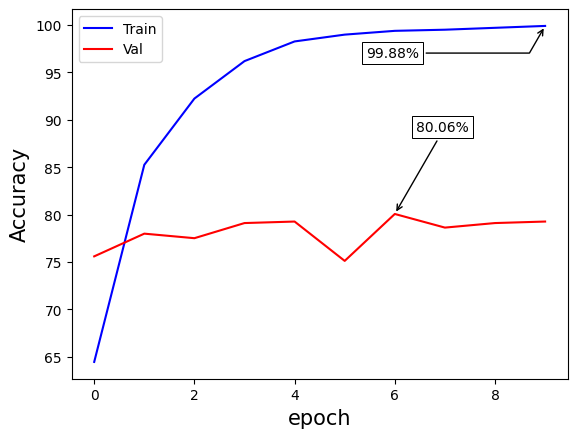

In [ ]:
plot_accuracy(model_fit)

# Analyze Result on Test Dataset

In [ ]:
def print_accuracy_stats(model, ds, class_names):
    model.load_weights("/tmp/checkpoint")
    true_onehot = tf.concat([y for x, y in ds], axis=0)
    true_categories = tf.argmax(true_onehot, axis=1)
    y_pred = model.predict(ds)
    predicted_categories = tf.argmax(y_pred, axis=1)

    test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
    print(f'\nTest Accuracy: {test_acc:.2f}%\n')

# Note: This doesn't work with shuffled datasets
def plot_confusion_matrix(model, ds, class_names):
    model.load_weights("/tmp/checkpoint")
    true_onehot = tf.concat([y for x, y in ds], axis=0)
    true_categories = tf.argmax(true_onehot, axis=1)
    y_pred = model.predict(ds)
    predicted_categories = tf.argmax(y_pred, axis=1)
    cm = metrics.confusion_matrix(true_categories,predicted_categories) # last batch
    sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names, cmap="YlGnBu", fmt='g')
    plt.show()

11/11 [==============================] - 2s 130ms/step

Test Accuracy: 73.22%

11/11 [==============================] - 2s 140ms/step


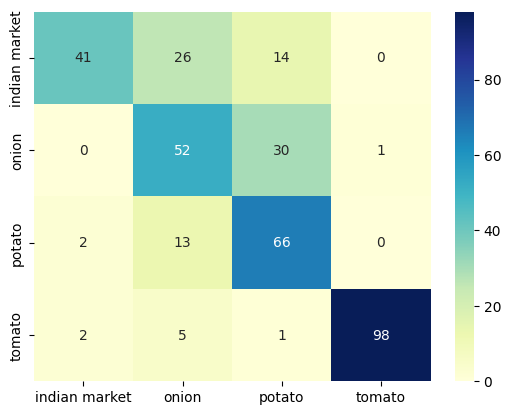

In [ ]:
print_accuracy_stats(model, test_ds, class_names)
plot_confusion_matrix(model, test_ds, class_names)

# Modification in Model CNN 1

In [ ]:
def arch_1(height=128, width=128):
    num_classes = 4
    hidden_size = 256

    model = keras.Sequential(
        name="model_cnn_1",
        layers=[
            layers.Conv2D(filters=16, kernel_size=3, padding="same", activation='relu', input_shape=(height, width, 3)),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=32, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=64, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=128, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=256, kernel_size=3, padding="same", activation='relu'),
            # layers.MaxPooling2D(),
            # layers.Flatten(),
            layers.GlobalAveragePooling2D(),
            layers.Dense(units=hidden_size, activation='relu'),
            layers.Dense(units=num_classes, activation='softmax')
        ]
    )
    return model

In [ ]:
model = arch_1()
model.summary()

Model: "model_cnn_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 64)        

In [ ]:
def compile_train_v1(model, train_ds, val_ds, epochs=10, ckpt_path="/tmp/checkpoint"):
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    model_fit = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[
        keras.callbacks.ModelCheckpoint(ckpt_path, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True),
    ])
    return model_fit

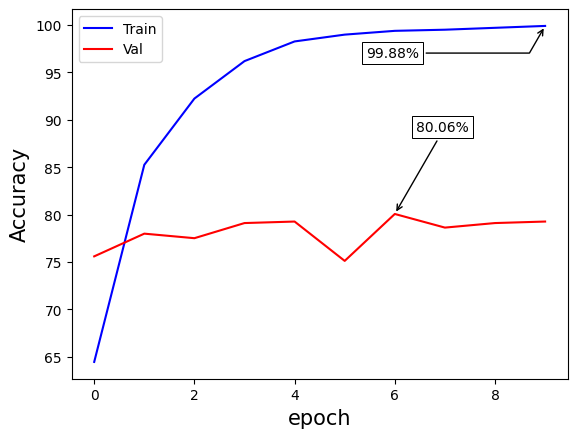

In [ ]:
plot_accuracy(model_fit)

# Increase epochs

In [ ]:
model_fit = compile_train_v1(model, train_ds, val_ds, epochs=30)

Epoch 1/30
79/79 [==============================] - 48s 573ms/step - loss: 1.0816 - accuracy: 0.4761 - val_loss: 0.8580 - val_accuracy: 0.5821
Epoch 2/30
79/79 [==============================] - 45s 557ms/step - loss: 0.7339 - accuracy: 0.6607 - val_loss: 0.6083 - val_accuracy: 0.7368
Epoch 3/30
79/79 [==============================] - 45s 552ms/step - loss: 0.5714 - accuracy: 0.7715 - val_loss: 0.4693 - val_accuracy: 0.8086
Epoch 4/30
79/79 [==============================] - 44s 543ms/step - loss: 0.4534 - accuracy: 0.8270 - val_loss: 0.5147 - val_accuracy: 0.8102
Epoch 5/30
79/79 [==============================] - 43s 533ms/step - loss: 0.4508 - accuracy: 0.8190 - val_loss: 0.3986 - val_accuracy: 0.8373
Epoch 6/30
79/79 [==============================] - 44s 550ms/step - loss: 0.3995 - accuracy: 0.8417 - val_loss: 0.6371 - val_accuracy: 0.7480
Epoch 7/30
79/79 [==============================] - 44s 545ms/step - loss: 0.4513 - accuracy: 0.8234 - val_loss: 0.4294 - val_accuracy: 0.8198

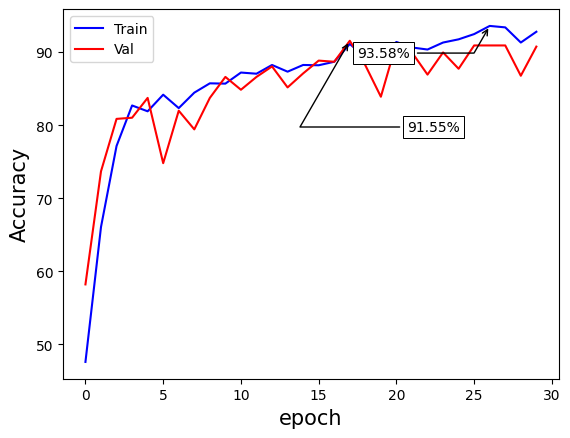

In [ ]:
plot_accuracy(model_fit)

11/11 [==============================] - 2s 170ms/step

Test Accuracy: 86.61%

11/11 [==============================] - 2s 170ms/step


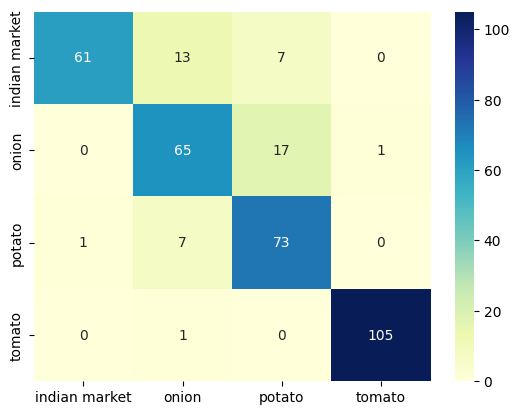

In [ ]:
print_accuracy_stats(model, test_ds, class_names)
plot_confusion_matrix(model, test_ds, class_names)

# Modification in Model CNN 2

In [ ]:
def arch_2(height=128, width=128):
    num_classes = 4
    hidden_size = 256

    model = keras.Sequential(
        name="model_cnn_2",
        layers=[
            layers.Conv2D(filters=16, kernel_size=3, padding="same", input_shape=(height, width, 3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=32, kernel_size=3, padding="same"),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=64, kernel_size=3, padding="same"),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=128, kernel_size=3, padding="same"),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=256, kernel_size=3, padding="same"),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            # layers.MaxPooling2D(),
            # layers.Flatten(),
            layers.GlobalAveragePooling2D(),
            layers.Dense(units=hidden_size),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.Dropout(0.5),
            layers.Dense(units=num_classes, activation='softmax')
        ]
    )
    return model

In [ ]:
model = arch_2()
model.summary()

Model: "model_cnn_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 activation (Activation)     (None, 128, 128, 16)      0         
                                                                 
 batch_normalization (Batch  (None, 128, 128, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 activation_1 (Activation)   (None, 64, 64, 32)        

In [ ]:
model_fit = compile_train_v1(model, train_ds, val_ds, epochs=30)

Epoch 1/30
79/79 [==============================] - 69s 817ms/step - loss: 0.8391 - accuracy: 0.7165 - val_loss: 1.4218 - val_accuracy: 0.3493
Epoch 2/30
79/79 [==============================] - 66s 814ms/step - loss: 0.5795 - accuracy: 0.7919 - val_loss: 1.3408 - val_accuracy: 0.5024
Epoch 3/30
79/79 [==============================] - 66s 812ms/step - loss: 0.4816 - accuracy: 0.8250 - val_loss: 1.1630 - val_accuracy: 0.5614
Epoch 4/30
79/79 [==============================] - 65s 803ms/step - loss: 0.4337 - accuracy: 0.8369 - val_loss: 1.5828 - val_accuracy: 0.5949
Epoch 5/30
79/79 [==============================] - 66s 817ms/step - loss: 0.4079 - accuracy: 0.8469 - val_loss: 1.7171 - val_accuracy: 0.5678
Epoch 6/30
79/79 [==============================] - 65s 803ms/step - loss: 0.3757 - accuracy: 0.8493 - val_loss: 0.8351 - val_accuracy: 0.6922
Epoch 7/30
79/79 [==============================] - 65s 810ms/step - loss: 0.3699 - accuracy: 0.8636 - val_loss: 0.6759 - val_accuracy: 0.7847

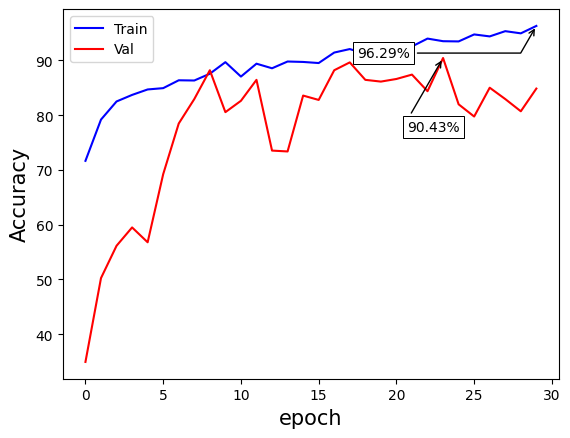

In [ ]:
plot_accuracy(model_fit)

# Modification ReduceLRonPlateau and EarlyStopping

In [7]:
def compile_train_v2(model, train_ds, val_ds, epochs=10, ckpt_path="/tmp/checkpoint"):
    callbacks = [
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss", factor=0.3, patience=5, min_lr=0.00001
        ),
        keras.callbacks.ModelCheckpoint(ckpt_path, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True),
        keras.callbacks.EarlyStopping(
            monitor="val_loss", patience=10, min_delta=0.001, mode='min'
        )
    ]
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    model_fit = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=callbacks)
    return model_fit

In [ ]:
model = arch_2()
model_fit = compile_train_v2(model, train_ds, val_ds, epochs=50)

In [ ]:
plot_accuracy(model_fit)

In [ ]:
print_accuracy_stats(model, test_ds, class_names)
plot_confusion_matrix(model, test_ds, class_names)

# Modification in Model CNN add L2 Regularization

In [ ]:
def arch_3(height=128, width=128):
    num_classes = 4
    hidden_size = 256

    model = keras.Sequential(
        name="model_cnn_3",
        layers=[
            layers.Conv2D(filters=16, kernel_size=3, padding="same", input_shape=(height, width, 3),
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=32, kernel_size=3, padding="same",
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=64, kernel_size=3, padding="same",
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=128, kernel_size=3, padding="same",
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=256, kernel_size=3, padding="same",
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            # layers.MaxPooling2D(),
            # layers.Flatten(),
            layers.GlobalAveragePooling2D(),
            layers.Dense(units=hidden_size, kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.Dropout(0.5),
            layers.Dense(units=num_classes, activation='softmax')
        ]
    )
    return model

In [ ]:
model = arch_3()
model.summary()

In [ ]:
model_fit = compile_train_v2(model, train_ds, val_ds, epochs=100)

In [ ]:
print_accuracy_stats(model, test_ds, class_names)
plot_confusion_matrix(model, test_ds, class_names)